<a href="https://colab.research.google.com/github/davidfu0826/CNN_tutorial/blob/master/tutorial_ZARA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASIC INFORMATION (ReadMe)
**1.  About Jupyter Notebook and Google Colab**
- Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning etc.
- Google Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. 

**2.   About this lab**

- In this lab we will explore and use Zalando's article images dataset called Fasion-MNIST. Each image in the dataset illustrates a certain article e.g. sneaker, T-shirt or dress.


- The goal is to classify the type of article given only the image. We will work mainly with the **convolutional neural network**. ML pipeline outlined in the theory part of the course will be followed. 


**3.  How to save own version of the Jupyter notebook**

- Go to File and choose "Save a copy in Drive". This will save your code notebook on your Google Drive.

**4.   How to run/execute cell of code**

- Alt 1: Ctrl+Enter tab through the code.
- Alt 2: Shift+Enter tab through the code.
- Alt 3:  Mark the cell,  press "Run" button on the left side of the cell.


**5.  More info about dataset**
 - Data source: https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

 - Image labels in the dataset:
1. T-shirt/top
2. Trouser
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
10. Pullover


#1) CLONE ENVIRONMENT & IMPORT LIBRARIES

##1.1. Get all the files
- Run the below code cell if the notebook is opened in Google Collab. It will clone the github repository to get all necessary files.

In [1]:
#!git clone https://github.com/NordAxon/AI-For-Leaders.git
!git clone https://github.com/davidfu0826/CNN_tutorial

Cloning into 'CNN_tutorial'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 71 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (71/71), done.


## 1.2 Import libraries
- ML with Python offers a great deal of libraries.
- Read about some of the most used: https://hackernoon.com/top-10-libraries-in-python-to-implement-machine-learning-12602cf5dc61
- Documentation about libs used in this lab:


> - Pandas: https://pandas.pydata.org/pandas-docs/stable/index.html <br>
> - Scikit-learn: https://scikit-learn.org/stable/ <br>
> - Keras: https://keras.io/

- Lets import all the libraries we need to run the code and perform the analysis. Run the below code cell.

In [0]:
import warnings
#warnings.simplefilter("ignore", UserWarning)
#warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", Warning)

# For downloading MNIST Zara fashion dataset
from tensorflow.keras.datasets import fashion_mnist

# For data visualization
import matplotlib.pyplot as plt
import numpy as np

from CNN_tutorial.utility_functions import load_example_image, visualize_convolution, visualize_dataset, scatter_plot
import seaborn as sns
from sklearn.decomposition import PCA

# Preprocessing
from tensorflow.keras.utils import to_categorical
from CNN_tutorial.utility_functions import prepare_binary_dataset

# Machine learning model
from sklearn.linear_model import LogisticRegression
from CNN_tutorial.utility_functions import build_CNN

#from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
#from tensorflow.keras.models import Model

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from CNN_tutorial.utility_functions import print_confusion_matrix

# 2) DOWNLOAD THE DATASET
- Usually a data scientist has to prepare the labeled image dataset beforehand, which might cost alot of money and time.
- Luckily for us, many common datasets e.g. MNIST digits, CIFAR10 and Fasion-MNIST are available directly through Machine Learning libraries. 
- We will use Keras API to directly download the Fasion-MNIST.

In [4]:
# Loading images
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# Size of the dataset (X, Y)
print ('Number of images and their dimensions: ' + str(train_images.shape))

Number of images and their dimensions: (60000, 28, 28)


# 3) DATA EXPLORATION
In order to create a model which will classify the Zalando articles with great performance we need to determine the *complexity* of the problem firsthand. In other words, we need to understand the dataset and get to know it better.

## 3.1 Visualizing dataset
- We start by visualizing a subset of the images
- Run the following code section below

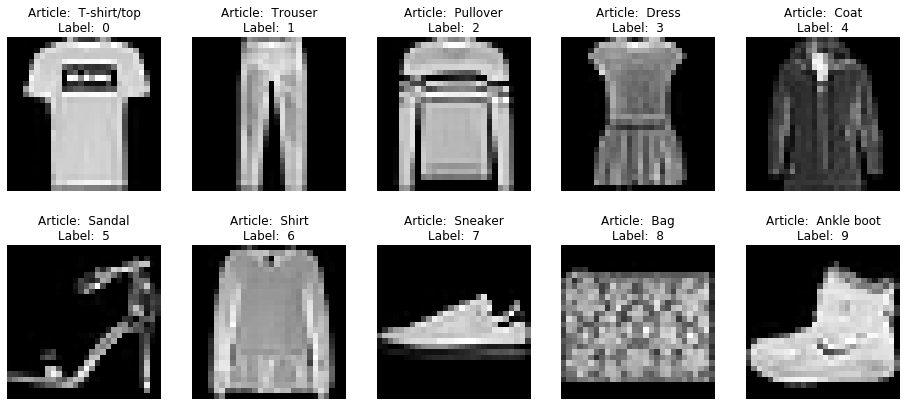

In [6]:
# Assigning each label to the corresponding index for visualization
label_to_article = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }

# Visualize one image from each class
visualize_dataset(train_images, train_labels, label_to_article)

# TODO:
- Explain what features are (refer to above image)
- Explain images and pixels
- Explain how pixels can be viewed as features
- Maybe visualization? (1 image explain more than 1000 words)
- Give introduction to more abstract features such as features extracted through convolutions

## 3.3 Image convolution

How does a model *know* that an image of a shoe is a shoe and not a T-shirt? One uses so called **features** to differentiate between different labels. For instance, one feature can be **the amount of horizontal lines** in an image. 

For image classification, one can **extract features** by peforming a mathematical operation called **convolution** with the help of a **kernel** (sometimes called a **filter**).

![Imgur](https://i.imgur.com/op9Maqr.png)

To illustrate this concept, run the following code to extract all the horizontal lines from an example image.


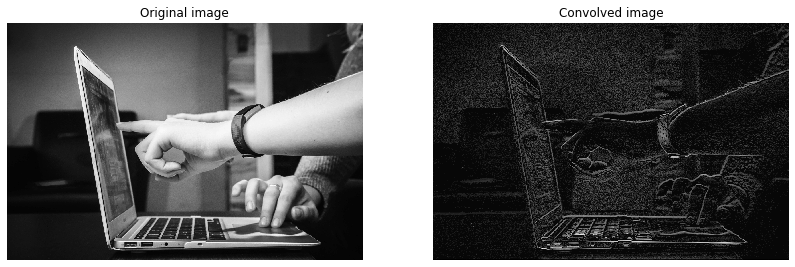

In [51]:
horizontal_line_conv = [[1, 1], 
                        [-1, -1]]
                        
example_image = load_example_image("CNN_tutorial/teaching.jpg") 
visualize_convolution(example_image, horizontal_line_conv)

### ASSIGNMENT 1:

In this assignment you need to edit the kernel by yourself.
- Instead of the horizontal line detector above, you will create a vertical line detector. **Edit the kernel** in the code cell below and run it.
- Hint: **Look at the horizontal line kernel and deduce how the vertical line kernel would look like. Try everything!*


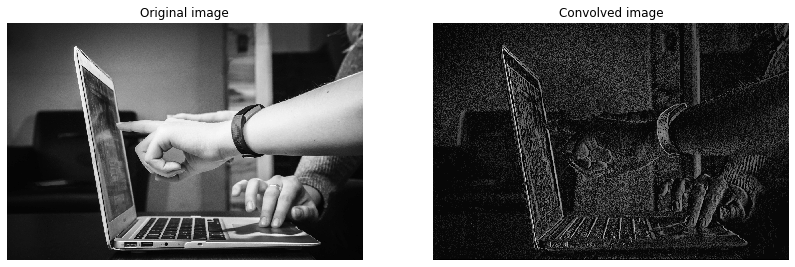

In [52]:
# EDIT KERNEL HERE (replace all underscores with numbers)
kernel = [[-1, 1], 
          [-1, 1]]

visualize_convolution(example_image, kernel)

### ASSIGNMENT 2:
In assignment 2 you used convolutions with 2x2 kernels. But it is also possible to use larger kernels such as 3x3 and 4x4. Even other shapes such as 2x3 are possible.

**Which of the following three sentences are true?**

- We can capture more features with larger kernels.
- We can capture more features with smaller kernels.
- The same amount of features can be captured by both large and small kernels.

### Final remark on convolutions
- So how do we determine which kernels/filters to use for optimal classification in our model? **We don't**. 
- With the help of **gradient descent**, we can train a **convolutional neural network (CNN)** to automatically find good kernels/filters.

## 3.4 Dimensionality reduction
- We would like to answer the question "*How complex is the dataset in terms of separability?*".
- One way to determine this is to use **dimensionality reduction**. 
  - In short, dimensionality reduction is a way to *compress* information/data.
  - There are many different approaches for this, e.g. *Principal Component Analysis (PCA)* and *T-distributed Stochastic Neighbor Embedding (t-SNE)*. 
  - We will use PCA to represent each image as a pair of coordinates **x** and **y**, in order to visualize it in a 2D-grid. 

- Run the following code section to perform dimensionality reduction on the Fasion-MNIST dataset.

- Note: **You dont have to understand the details of PCA in order to use it. Just observe the resulting figure* .

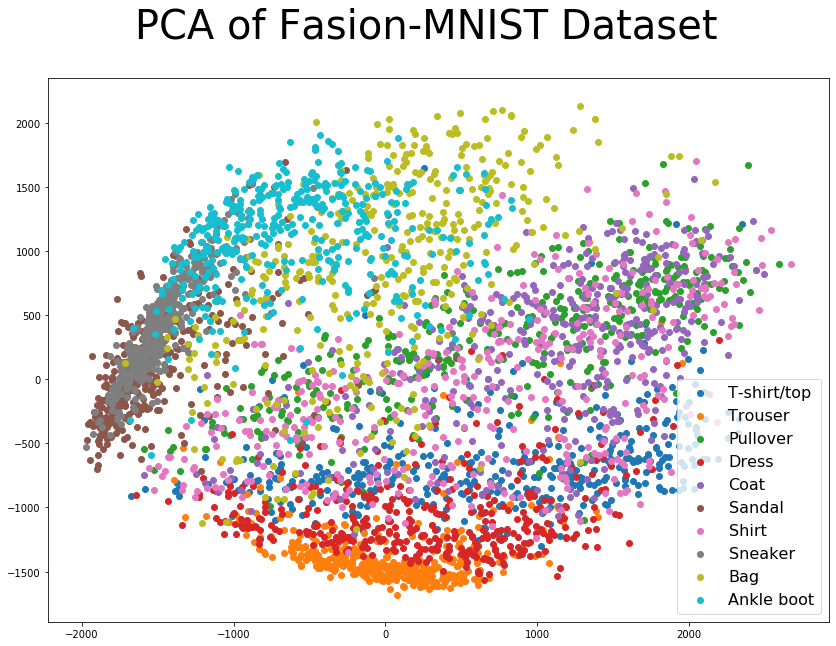

In [9]:
# Compute PCA
pca = PCA(n_components=2)
flattened_img = np.reshape(train_images, [-1, 28*28])
pca_img = pca.fit_transform(flattened_img)

# Display results
scatter_plot(pca_img, train_labels, label_to_article, title='PCA', nbr_samples=400)


### ASSIGNMENT 3:

In this assignment you need to **observe the figure above** and **think through the following questions**:

- Sneakers and Sandals are more similar to each other in comparison to Sneakers and Trousers. Is it possible to conclude that from just looking at the figure above?
- Are there other classes that are similar?
- Which classes **can be separated** by a straight line? 
- Which classes **cannot be separated** by a straight line?
- **Hint:** Which classes overlap each other? Which classes don't? What conclusions do you draw from that? 

### ASSIGNMENT 3 ADVANCED (OPTIONAL)
Perform t-SNE decomposition on the Zalando dataset.

Hints: 
 - Look at the documentation here https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
 - The images that are stored in the variable ```train_images``` need to be flattened before being passed. See above example where ```reshape``` is used.

In [0]:
from sklearn.manifold import TSNE

############ FILL IN YOUR CODE BELOW ##########################

# <FILL IN YOUR CODE HERE>

############ FILL IN YOUR CODE ABOCE #########################

scatter_plot(tsne, train_labels, label_to_article, title='t-SNE', nbr_samples=400)

# 4) DATA PRE-PROCESSING
- Typically a Data Scientist spends 70% of the time doing arduous pre-processing. It can involve i.e. *cleaning datasets*, *balancing imbalanced datasets*, and *denoising images*. In our case, the Fasion-MNIST dataset is already pre-processed for educational/benchmarking purposes.

- The images are RGB-encoded have values that range from 0 to 255. To improve performance for our chosen models, the values are rescaled from 0 to 1.


In [0]:
normalized_train_images = train_images/255.
normalized_test_images = test_images/255.

# 5) MODEL TRAINING AND EVALUATION

## 5.1 Binary Classification: **Logistic Regression**
- Our starting model for binary classification will be the Logistic Regression (The name might suggest a regression model but it is actually a classification model).

- We will use all pixel values as features for our model.

- **Geometrical interpretation**: Imagine drawing a *straight line* to separate two types of articles in the figure displayed in *Assignment 1*. Keep this image in your head for the next assignment.

- In the following table, all the label-article pair for the dataset are displayed again to facilitate for the reader.



    0. "T-shirt/top",
    1. "Trouser",
    2. "Pullover",
    3. "Dress",
    4. "Coat",
    5. "Sandal",
    6. "Shirt",
    7. "Sneaker",
    8. "Bag",
    9. "Ankle boot"

#### Data preperation
For binary classification we only need **two classes**. Therefore, we select only the relevant classes in the following code.

In [0]:
# EDIT HERE: Select two classes from the table above
first_label = 3 # Dress
second_label = 7 # Sneaker

# Extract only the images and the labels for Sneakers and Dresses
X_train, y_train = prepare_binary_dataset(normalized_train_images, train_labels, first_label, second_label)
X_test, y_test = prepare_binary_dataset(normalized_test_images, test_labels, first_label, second_label)

#### Model selection
Then we create the model using *Scikit-Learn* API.

In [0]:
linear_model = LogisticRegression()

#### Model training
Only the *training set* is used for training. In other words, the *test set* is left out during training.

In [0]:
linear_model.fit(X_train, y_train);

#### Model evaluation
Now the model is evaluated using the test set (which was excluded from training).

Train accuracy: 100.0%
Test accuracy:  100.0%


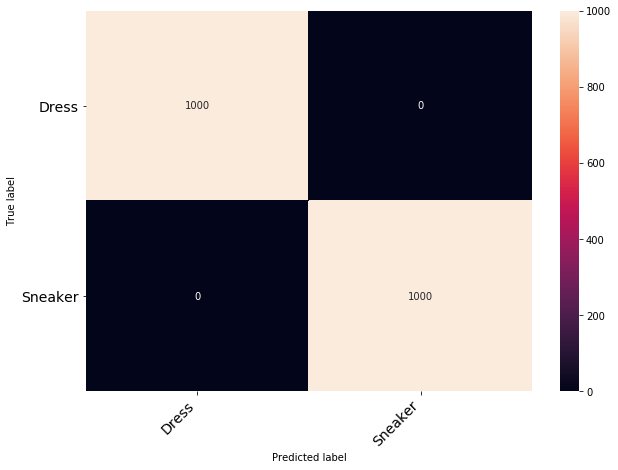

In [0]:
train_predictions = linear_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = linear_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train accuracy: {100*train_accuracy}%")
print(f"Test accuracy:  {100*test_accuracy}%")
data = confusion_matrix(y_test, test_predictions)

first_title = label_to_article[first_label]
second_title = label_to_article[second_label]
print_confusion_matrix(data, class_names=[first_title, second_title]);

### ASSIGNMENT 4:
- What test accuracy did we get when classifying between *Dress* and *Sneaker*? *Can you explain the results from looking at the figure from Assignment 1*?
- Modify the code such that it classifies between the articles *Pullover* and *Coat* in the code cell below.
- Did you get higher or lower accuracy? *Can you explain why from looking at the figure from Assignment 1*?

In [0]:
## ENTER YOUR CODE HERE

## 5.2 Multiclass Classification: **Convolutional Neural Network (CNN)**
Now, we will take advantage of *convolutional features*

#### Data preperation
In contrast to binary classification, we keep all the images as CNN can perform multiclass classification. In addition, instead of Scikit-Learn we use *Keras API* for building our model instead. 

In [0]:
# Images are reshapen from (-1, 28, 28) to (-1, 28, 28, 1) in acc. with Keras API
new_shape = (-1, 28, 28, 1)
X_train = np.reshape(normalized_train_images, new_shape) 
X_test = np.reshape(normalized_test_images, new_shape) 

# Target values are one-hot encoded for multiclass classification
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#### Model selection
We use Keras API to build our CNN.


In [0]:
# Number of kernels in each layer
# For instance, [64, 32] means 64 filters in first layer, 32 filters in the second layer
nbr_filters = [64, 64] 

# The shape of all kernels (e.g. in previous assignment you defined a 2x2 kernel)
kernel_shape = (3, 3) # 

# Number of nodes in each fully-connected layer
nbr_nodes = [64]


# Build model
model = build_CNN(nbr_filters=nbr_filters, 
                  kernel_shape=kernel_shape, 
                  nbr_nodes=nbr_nodes)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Model training

In [0]:
model.fit(X_train, y_train);

Train on 60000 samples
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.7910 - acc: 0.7166


#### Model evaluation

Train accuracy: 81.34166666666667%
Test accuracy: 80.34%


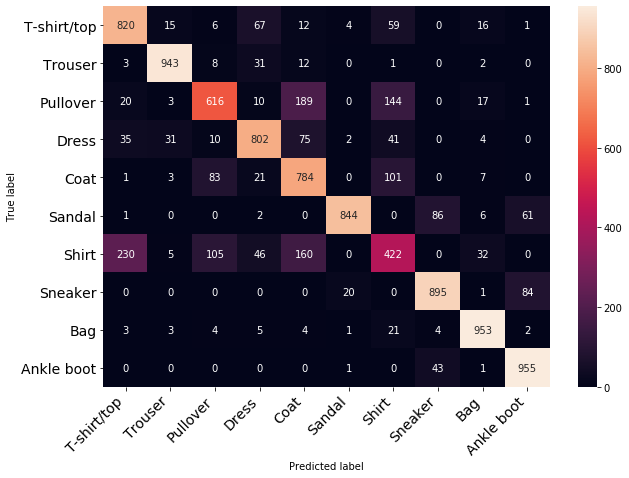

In [0]:
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train.argmax(axis=1), train_predictions.argmax(axis=1))

test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test.argmax(axis=1), test_predictions.argmax(axis=1))

print(f"Train accuracy: {100*train_accuracy}%")
print(f"Test accuracy: {100*test_accuracy}%")
data = confusion_matrix(y_test.argmax(axis=1), test_predictions.argmax(axis=1))
print_confusion_matrix(data, class_names=label_to_article.values());

### ASSIGNMENT 5:
- Modify the code and try to improve the performance of the CNN model.

In [0]:
# Idea: Display misclassified images. And discuss why it was misclassified.
# Idea: Plot a grid of all learned kernels

In [0]:
import shutil

shutil.rmtree('CNN_tutorial')